In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from graphviz import Digraph
from decision_tree import DecisionTree

In [2]:
# Load data and split into train test
dt = load_breast_cancer()
X = pd.DataFrame(dt.data, columns= list(dt.feature_names))
y = pd.Series(dt.target)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)

In [ ]:
# Initialize a DecisionTree object
tree = DecisionTree( max_depth= 5)
# Train the tree
tree.fit(X_train, y_train)

best_lambda: 0.1, feature: worst perimeter, threshold: 91.63 Depth: 0
best_lambda: 0.1, feature: worst smoothness, threshold: 0.1902 Depth: 1
best_lambda: 0.1, feature: radius error, threshold: 0.6061 Depth: 2
best_lambda: 0.1, feature: mean compactness, threshold: 0.05914 Depth: 3
best_lambda: 0.1, feature: mean radius, threshold: 9.676 Depth: 2
best_lambda: 0.1, feature: worst concave points, threshold: 0.1561 Depth: 1
best_lambda: 0.1, feature: mean texture, threshold: 16.54 Depth: 2
best_lambda: 0.1, feature: worst perimeter, threshold: 120.3 Depth: 3
best_lambda: 0.1, feature: worst concavity, threshold: 0.206 Depth: 4
best_lambda: 0.1, feature: radius error, threshold: 0.4426 Depth: 5
best_lambda: 0.1, feature: worst radius, threshold: 16.76 Depth: 5


In [4]:
# Make predictions
predictions = tree.predict(X_test)

        Metric     Value
0     Accuracy  0.947368
1    Precision  0.945205
2       Recall  0.971831
3     F1 Score  0.958333
4          MCC  0.887573
5  Cohen Kappa  0.886942
6      AUC-ROC  0.939404
7       AUC-PR  0.967290


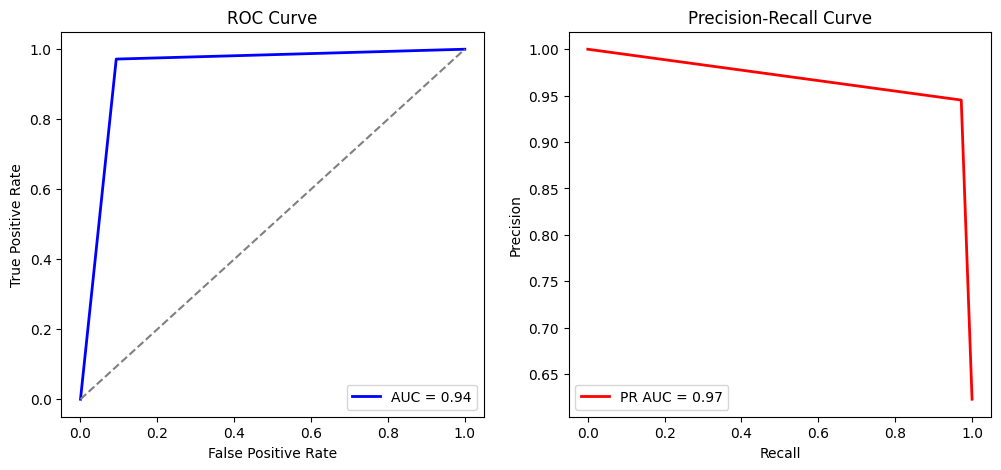

In [5]:
# Evaluate performance
metrics_df = tree.performance_metrics(X_test, y_test)

In [6]:
# Extract rules
rules = tree.extract_rules()
for rule in rules:
    print(rule)

 worst perimeter <= 91.63 &  worst smoothness <= 0.1902 &  radius error <= 0.6061 => Prediction: 1
 worst perimeter <= 91.63 &  worst smoothness <= 0.1902 &  radius error > 0.6061 => Prediction: 1
 worst perimeter <= 91.63 &  worst smoothness > 0.1902 => Prediction: 0
 worst perimeter > 91.63 &  worst concave points <= 0.1561 &  mean texture <= 16.54 => Prediction: 1
 worst perimeter > 91.63 &  worst concave points <= 0.1561 &  mean texture > 16.54 &  worst perimeter <= 120.3 &  worst concavity <= 0.206 &  radius error <= 0.4426 => Prediction: 1
 worst perimeter > 91.63 &  worst concave points <= 0.1561 &  mean texture > 16.54 &  worst perimeter <= 120.3 &  worst concavity <= 0.206 &  radius error > 0.4426 => Prediction: 0
 worst perimeter > 91.63 &  worst concave points <= 0.1561 &  mean texture > 16.54 &  worst perimeter <= 120.3 &  worst concavity > 0.206 &  worst radius <= 16.76 => Prediction: 1
 worst perimeter > 91.63 &  worst concave points <= 0.1561 &  mean texture > 16.54 &  w

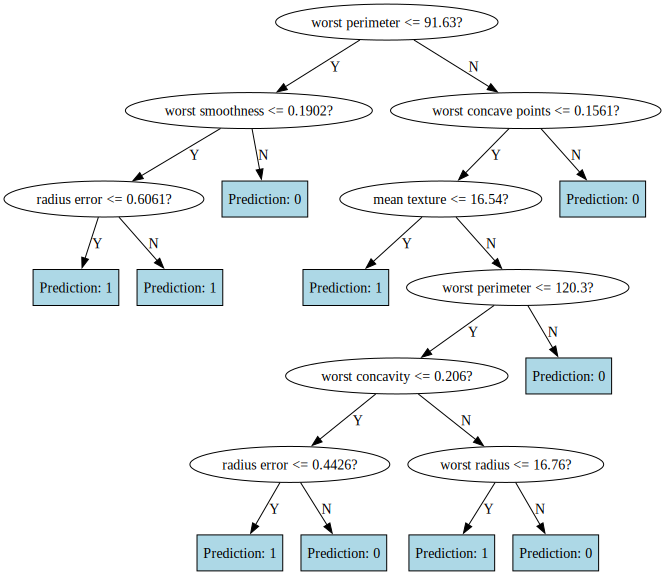

In [7]:
# Plot tree
graph = Digraph(format='png')
_ = tree.plot_tree(graph=graph)
display(graph)